
# 🎙️ Voice-Enabled Business Intelligence System
### (Rule-Based NLP + Python + Power BI)

# 3 Project Overview:
### This Python project demonstrates a voice-driven Business Intelligence (BI) system.
### Users can interact with business data using natural language voice commands, and the system
### automatically generates analytical insights and outputs them as CSV files for Power BI dashboards.

## Repository Scope:
### - Python scripts perform voice input, intent detection, and automated data analysis.
### - Outputs are saved in the `output/` folder as CSV files.
### - Jupyter notebooks in `notebooks/` are used for exploration and development.
### - Power BI assets in `powerbi/` folder use the exported CSVs to generate interactive dashboards.

## Data:
###  Dataset sourced from Kaggle and treated as a real-world retail sales scenario.”


## Key Functionalities:
### - Voice input is captured using SpeechRecognition and PyAudio.
### - Rule-based NLP maps spoken commands to analysis intents (e.g., "monthly orders", "sales by person").
### - Python performs aggregation, summarization, and plotting using pandas, matplotlib, seaborn.
### - CSV outputs are structured for direct use in Power BI dashboards.
### - Optional: Jupyter notebooks provide EDA and testing of analysis functions.

## Technologies:
### - Python (3.10)
### - pandas, numpy, matplotlib, seaborn, nltk
### - SpeechRecognition, PyAudio
## - Power BI

## Usage:
### - Run `python run_voice_bi.py` from the project root to start voice-driven analysis.
### - Ensure the environment includes all dependencies listed in `requirements.txt` or README.md.




In [48]:
import pyaudio
import speech_recognition as sr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

print("All packages loaded successfully")


All packages loaded successfully


In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
df= pd.read_csv("Sales_2024.csv")
df

,Date,Region,Product,Salesperson,Units_Sold,Unit_Price,Category,Revenue,Cost,Profit
0,2024-04-12 00:00:00,North,Smartwatch,Hannah,15.0,1224.0,Accessories,18360.0,16451.634260,1908.365742
1,2024-12-14 00:00:00,North,Monitor,Eva,5.0,1321.0,Office,6605.0,4457.351727,2147.648273
2,2024-09-27 00:00:00,North,Mobile,Bob,11.0,912.0,Electronics,10032.0,6563.644126,3468.355874
3,2024-04-16 00:00:00,West,Monitor,Charlie,18.0,325.0,Office,5850.0,4320.807092,1529.192908
4,2024-03-12 00:00:00,West,Headphones,Eva,13.0,1042.0,Accessories,13546.0,8270.122666,5275.877334
...,...,...,...,...,...,...,...,...,...,...
1995,2024-10-10 00:00:00,East,Headphones,David,3.0,1333.0,Accessories,3999.0,3227.051448,771.948552
1996,2024-04-30 00:00:00,North,Tablet,Alice,6.0,703.0,Electronics,4218.0,3249.244924,968.755076
1997,2024-04-16 00:00:00,North,Smartwatch,Grace,7.0,1760.0,Accessories,12320.0,8980.011984,3339.988016
1998,2024-06-23 00:00:00,South,Printer,Charlie,1.0,1114.0,Office,1114.0,941.813213,172.186787


In [75]:
df.shape

(2000, 10)

In [76]:
df.columns

Index(['Date', 'Region', 'Product', 'Salesperson', 'Units_Sold', 'Unit_Price',
       'Category', 'Revenue', 'Cost', 'Profit'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2000 non-null   object 
 1   Region       1961 non-null   object 
 2   Product      1960 non-null   object 
 3   Salesperson  1960 non-null   object 
 4   Units_Sold   1960 non-null   float64
 5   Unit_Price   1960 non-null   float64
 6   Category     2000 non-null   object 
 7   Revenue      1921 non-null   float64
 8   Cost         1921 non-null   float64
 9   Profit       1921 non-null   float64
dtypes: float64(5), object(5)
memory usage: 156.4+ KB


In [51]:
# Change Date type into datetime
df["Date"]= pd.to_datetime(df["Date"])

### Create time fetures

In [52]:
# Extract year from the Date column
df['Year'] = df['Date'].dt.year

# Extract month name from the Date column
df['Month'] = df['Date'].dt.month_name()


In [6]:
df.dtypes

Date           datetime64[ns]
Region                 object
Product                object
Salesperson            object
Units_Sold            float64
Unit_Price            float64
Category               object
Revenue               float64
Cost                  float64
Profit                float64
Year                    int32
Month                  object
dtype: object

## Data Quality Checks
#### 🔹 Missing Values

In [53]:
df.isnull().sum().sort_values(ascending=False)


Cost           79
Profit         79
Revenue        79
Salesperson    40
Unit_Price     40
Units_Sold     40
Product        40
Region         39
Date            0
Category        0
Year            0
Month           0
dtype: int64

#### Percentage

In [54]:
(df.isnull().mean() * 100).round(2)


Date           0.00
Region         1.95
Product        2.00
Salesperson    2.00
Units_Sold     2.00
Unit_Price     2.00
Category       0.00
Revenue        3.95
Cost           3.95
Profit         3.95
Year           0.00
Month          0.00
dtype: float64

In [73]:
#df = df.dropna(subset=['Region', 'Product'])

In [55]:
df.isna().sum()


Date            0
Region         39
Product        40
Salesperson    40
Units_Sold     40
Unit_Price     40
Category        0
Revenue        79
Cost           79
Profit         79
Year            0
Month           0
dtype: int64

In [56]:
(df == "").sum()


Date           0
Region         0
Product        0
Salesperson    0
Units_Sold     0
Unit_Price     0
Category       0
Revenue        0
Cost           0
Profit         0
Year           0
Month          0
dtype: int64

In [57]:
df.isin(['NA', 'N/A', 'null', 'None', ' ']).sum()


Date           0
Region         0
Product        0
Salesperson    0
Units_Sold     0
Unit_Price     0
Category       0
Revenue        0
Cost           0
Profit         0
Year           0
Month          0
dtype: int64

In [58]:
import numpy as np

df = df.replace(['', ' ', 'NA', 'N/A', 'null', 'None'], np.nan)


In [59]:
df.isnull().sum()


Date            0
Region         39
Product        40
Salesperson    40
Units_Sold     40
Unit_Price     40
Category        0
Revenue        79
Cost           79
Profit         79
Year            0
Month           0
dtype: int64

In [60]:
df= df.dropna()

In [61]:
df_clean = df.dropna()


In [62]:
df.isnull().sum().sort_values(ascending=False)

Date           0
Region         0
Product        0
Salesperson    0
Units_Sold     0
Unit_Price     0
Category       0
Revenue        0
Cost           0
Profit         0
Year           0
Month          0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1814 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1814 non-null   datetime64[ns]
 1   Region       1814 non-null   object        
 2   Product      1814 non-null   object        
 3   Salesperson  1814 non-null   object        
 4   Units_Sold   1814 non-null   float64       
 5   Unit_Price   1814 non-null   float64       
 6   Category     1814 non-null   object        
 7   Revenue      1814 non-null   float64       
 8   Cost         1814 non-null   float64       
 9   Profit       1814 non-null   float64       
 10  Year         1814 non-null   int32         
 11  Month        1814 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(1), object(5)
memory usage: 177.1+ KB


#### Duplicate Records

In [64]:
df.duplicated().sum()


np.int64(0)

In [73]:
df['Calculated_Revenue'] = df['Units_Sold'] * df['Unit_Price']


C:\Users\USER\AppData\Local\Temp\ipykernel_20380\4210373684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calculated_Revenue'] = df['Units_Sold'] * df['Unit_Price']


In [65]:
df['Revenue'] = df['Units_Sold'] * df['Unit_Price']
df['Profit'] = df['Revenue'] - df['Cost']


In [37]:
df

,Date,Region,Product,Salesperson,Units_Sold,Unit_Price,Category,Revenue,Cost,Profit,Year,Month
0,2024-04-12,North,Smartwatch,Hannah,15.0,1224.0,Accessories,18360.0,16451.634260,1908.365740,2024,April
1,2024-12-14,North,Monitor,Eva,5.0,1321.0,Office,6605.0,4457.351727,2147.648273,2024,December
2,2024-09-27,North,Mobile,Bob,11.0,912.0,Electronics,10032.0,6563.644126,3468.355874,2024,September
3,2024-04-16,West,Monitor,Charlie,18.0,325.0,Office,5850.0,4320.807092,1529.192908,2024,April
4,2024-03-12,West,Headphones,Eva,13.0,1042.0,Accessories,13546.0,8270.122666,5275.877334,2024,March
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2024-10-10,East,Headphones,David,3.0,1333.0,Accessories,3999.0,3227.051448,771.948552,2024,October
1996,2024-04-30,North,Tablet,Alice,6.0,703.0,Electronics,4218.0,3249.244924,968.755076,2024,April
1997,2024-04-16,North,Smartwatch,Grace,7.0,1760.0,Accessories,12320.0,8980.011984,3339.988016,2024,April
1998,2024-06-23,South,Printer,Charlie,1.0,1114.0,Office,1114.0,941.813213,172.186787,2024,June


## Descriptive statistics

#### Numerical Summary

In [66]:
df[['Units_Sold', 'Unit_Price', 'Revenue', 'Cost', 'Profit']].describe()


,Units_Sold,Unit_Price,Revenue,Cost,Profit
count,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,10.146637,1066.868247,10858.127343,8120.666028,2737.461315
std,5.610692,542.083884,8744.767086,6662.448692,2511.941172
min,-5.000000,-100.000000,-8975.000000,-7905.695724,-1069.304276
25%,5.000000,602.500000,3617.000000,2686.730414,793.962629
50%,10.000000,1075.000000,8396.000000,6075.100817,1946.617471
75%,15.000000,1524.500000,16584.750000,12408.738470,3967.725641
max,19.000000,1997.000000,37715.000000,31723.724910,14409.770720


### Categorical Summary

In [67]:
df['Region'].value_counts()

Region
West     466
North    461
South    447
East     430
south      2
westt      2
Easst      2
NORTH      2
north      2
Name: count, dtype: int64

In [68]:
df["Region"]= df["Region"].str.strip().str.lower()

In [74]:
Region_map= {
    "west": "West",
    "westt": "West",

    "north": "North",
    "north": "North",
    "north": "North",

    "South": "South",
    "south": "South",

    "east": "East",
    "easst": "East"
}

In [69]:
region_map = {
    'north': 'North',
    'nort': 'North',
    'northh': 'North',

    'south': 'South',
    'southh': 'South',

    'east': 'East',
    'easst': 'East',

    'west': 'West',
    'westt': 'West'
}


In [72]:
df["Region"]= df["Region"].replace(Region_map)

In [73]:
df["Region"].value_counts()

Region
West     468
North    465
South    449
East     432
Name: count, dtype: int64

In [75]:
df['Category'].value_counts()

Category
Electronics    930
Accessories    453
Office         431
Name: count, dtype: int64

In [76]:
df["Product"].value_counts()

Product
Tablet        245
Laptop        240
Smartwatch    236
Camera        224
Monitor       216
Mobile        215
Headphones    214
Printer       214
tabllet         2
MOBLIE          2
SMARTWATCH      2
headPhones      2
laptop          2
Name: count, dtype: int64

In [91]:
df["Product"]= df["Product"].str.strip().str.lower()

In [113]:
Product_map= {
    "tabllet": "Tablet",
    "tablet": "Tablet",

    "laptop": "Laptop",
    "laptop": "Laptop",

    "smartwatch": "Smartwatch",
    "sMARTWATCH": "Smartwatch",

    "mobile": "Mobile",
    "moblie": "Mobile",
   

    "headphones": "Headphones",
    "headphones": "Headphones",

    "camera": "Camera",
    "monitor": "Monitor",
    "printer": "Printer",
}

    



In [114]:
df["Product"]= df["Product"].replace(Product_map)

In [115]:
df["Product"].value_counts()

Product
Tablet        247
Laptop        242
Smartwatch    238
Camera        224
Mobile        217
Monitor       216
Headphones    216
Printer       214
Name: count, dtype: int64

# voice command function

In [116]:
def get_voice_command():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("🎙 Speak your BI command...")
        audio = r.listen(source)

    try:
        command = r.recognize_google(audio)
        print("✅ You said:", command)
        return command.lower()
    except sr.UnknownValueError:
        print("❌ Could not understand your speech.")
        return ""
    except sr.RequestError:
        print("❌ Google service error.")
        return ""

In [117]:
# Intent → keywords mapping (dataset-aware)
INTENT_KEYWORDS = {

    # 1️⃣ Sales / Revenue analysis
    "revenue_by_salesperson": [
        "sales by salesperson", "revenue by person", "employee sales",
        "salesperson performance", "who sold most", "sales person"
    ],

    "revenue_by_region": [
        "sales by region", "regional sales", "revenue by region",
        "which region performs best"
    ],

    "revenue_by_product": [
        "sales by product", "product performance", "top product",
        "which product sells most"
    ],

    "revenue_by_category": [
        "category sales", "revenue by category",
        "category performance"
    ],

    # 2️⃣ Profit analysis
    "profit_by_region": [
        "profit by region", "regional profit", "most profitable region"
    ],

    "profit_by_product": [
        "profit by product", "most profitable product",
        "product profit"
    ],

    "profit_margin_analysis": [
        "profit margin", "margin analysis",
        "low margin products"
    ],

    # 3️⃣ Pricing & quantity
    "units_sold_analysis": [
        "units sold", "quantity sold",
        "items sold", "sales volume"
    ],

    "price_analysis": [
        "price", "unit price analysis",
        "pricing trend"
    ],

    # 4️⃣ Time-based analysis
    "monthly_revenue_trend": [
        "monthly sales", "monthly revenue",
        "sales trend", "month wise sales"
    ],

    "yearly_revenue_trend": [
        "yearly sales", "annual revenue",
        "year wise sales"
    ],

    # 5️⃣ Cost analysis
    "cost_by_category": [
        "cost by category", "category cost",
        "high cost products"
    ]
}
def parse_command(command):
    command = command.lower()

    for intent, keywords in INTENT_KEYWORDS.items():
        if any(keyword in command for keyword in keywords):
            return intent

    return "unknown_intent"



In [118]:
def add_labels(ax, x_col, y_col, rotate=False):
    # Loop through each bar/patch in the seaborn plot
    for p in ax.patches:
        # Calculate x-position (center of bar)
        x = p.get_x() + p.get_width() / 2
        
        # Height of bar (y-value)
        y = p.get_height()
        
        # Add numeric label on top of each bar
        ax.annotate(
            f'{int(y)}',      # Convert value to integer for clean display
            (x, y),           # Position of label
            ha='center',      # Horizontal alignment
            va='bottom'       # Vertical alignment
        )
    
    # Rotate x-axis labels if needed (useful for long names)
    if rotate:
        plt.xticks(rotation=45)


In [119]:
def analyze_and_plot(intent):
    plt.figure(figsize=(10, 5))

    # Power BI expected schema (dataset-aware)
    expected_cols = [
        "Date", "Region", "Product", "Salesperson",
        "Units_Sold", "Unit_Price",
        "Category", "Revenue", "Cost", "Profit"
    ]

    # -------------------- Revenue Analysis --------------------

    if intent == "revenue_by_salesperson":
        data = df.groupby("Salesperson")["Revenue"].sum().reset_index()

        ax = sns.barplot(data=data, x="Salesperson", y="Revenue")
        plt.title("Revenue by Salesperson")
        add_labels(ax, "Salesperson", "Revenue", rotate=True)

    elif intent == "revenue_by_region":
        data = df.groupby("Region")["Revenue"].sum().reset_index()

        ax = sns.barplot(data=data, x="Region", y="Revenue")
        plt.title("Revenue by Region")
        add_labels(ax, "Region", "Revenue")

    elif intent == "revenue_by_product":
        data = df.groupby("Product")["Revenue"].sum().reset_index()
        data = data.sort_values("Revenue", ascending=False).head(10)

        ax = sns.barplot(data=data, x="Product", y="Revenue")
        plt.title("Top 10 Products by Revenue")
        add_labels(ax, "Product", "Revenue", rotate=True)

    elif intent == "revenue_by_category":
        data = df.groupby("Category")["Revenue"].sum().reset_index()

        ax = sns.barplot(data=data, x="Category", y="Revenue")
        plt.title("Revenue by Category")
        add_labels(ax, "Category", "Revenue")

    # -------------------- Profit Analysis --------------------

    elif intent == "profit_by_region":
        data = df.groupby("Region")["Profit"].sum().reset_index()

        ax = sns.barplot(data=data, x="Region", y="Profit")
        plt.title("Profit by Region")
        add_labels(ax, "Region", "Profit")

    elif intent == "profit_by_product":
        data = df.groupby("Product")["Profit"].sum().reset_index()
        data = data.sort_values("Profit", ascending=False).head(10)

        ax = sns.barplot(data=data, x="Product", y="Profit")
        plt.title("Top 10 Products by Profit")
        add_labels(ax, "Product", "Profit", rotate=True)

    elif intent == "profit_margin_analysis":
        data = df.groupby("Product").agg({
            "Revenue": "sum",
            "Profit": "sum"
        }).reset_index()

        data["Profit_Margin"] = data["Profit"] / data["Revenue"]

        ax = sns.barplot(data=data.sort_values("Profit_Margin", ascending=False).head(10),
                          x="Product", y="Profit_Margin")

        plt.title("Top Products by Profit Margin")
        plt.xticks(rotation=45)

    # -------------------- Quantity & Price --------------------

    elif intent == "units_sold_analysis":
        data = df.groupby("Product")["Units_Sold"].sum().reset_index()
        data = data.sort_values("Units_Sold", ascending=False).head(10)

        ax = sns.barplot(data=data, x="Product", y="Units_Sold")
        plt.title("Top 10 Products by Units Sold")
        add_labels(ax, "Product", "Units_Sold", rotate=True)

    elif intent == "price_analysis":
        data = df.groupby("Product")["Unit_Price"].mean().reset_index()
        data = data.sort_values("Unit_Price", ascending=False).head(10)

        ax = sns.barplot(data=data, x="Product", y="Unit_Price")
        plt.title("Average Unit Price by Product")
        add_labels(ax, "Product", "Unit_Price", rotate=True)

    # -------------------- Time Series --------------------

    elif intent == "monthly_revenue_trend":
        df["Month"] = df["Date"].dt.to_period("M")

        data = df.groupby("Month")["Revenue"].sum().reset_index()
        data["Month"] = data["Month"].astype(str)

        ax = sns.lineplot(data=data, x="Month", y="Revenue", marker="o")
        plt.title("Monthly Revenue Trend")

        for x, y in zip(data["Month"], data["Revenue"]):
            ax.annotate(f'{y:.0f}', (x, y),
                        textcoords="offset points", xytext=(0,5), ha='center')

        plt.xticks(rotation=45)

    # -------------------- Cost Analysis --------------------

    elif intent == "cost_by_category":
        data = df.groupby("Category")["Cost"].sum().reset_index()

        ax = sns.barplot(data=data, x="Category", y="Cost")
        plt.title("Cost by Category")
        add_labels(ax, "Category", "Cost")

    else:
        print("❌ Unknown intent")
        return

    # -------------------- Power BI Safety Layer --------------------

    for col in expected_cols:
        if col not in data.columns:
            data[col] = None

    data = data[expected_cols]

    # Export for Power BI
    data.to_csv(
        "D:/voice_bi_project/Data/voice_output2.csv",
        index=False
    )
    df.to_csv("D:/voice_bi_project/Data/sales_master.csv", index=False)
    




    print("✅ Saved to voice_output2.csv (Power BI–safe schema)")

    plt.tight_layout()
    plt.show()

    



## Run the Full Flow

In [120]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")

🎙 Speak your BI command...
✅ You said: sales person
Intent detected: revenue_by_salesperson
✅ Saved to voice_output2.csv (Power BI–safe schema)


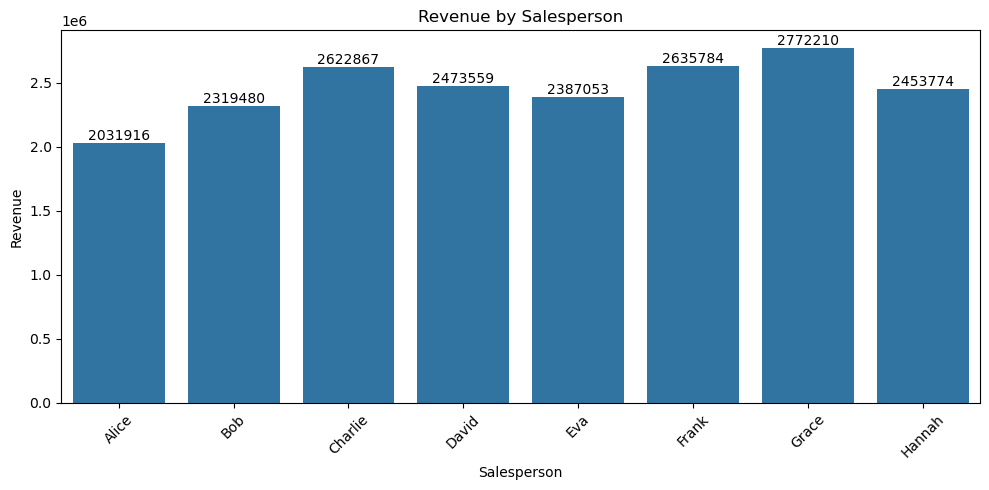

In [121]:
run_voice_bi()

🎙 Speak your BI command...
✅ You said: sales by region
Intent detected: revenue_by_region
✅ Saved to voice_output2.csv (Power BI–safe schema)


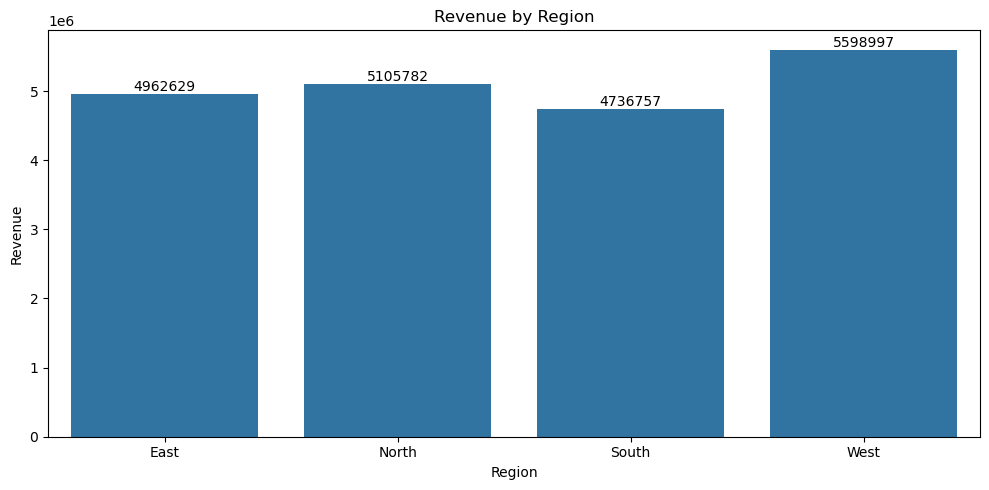

In [111]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: sales person
Intent detected: revenue_by_salesperson
✅ Saved to voice_output2.csv (Power BI–safe schema)


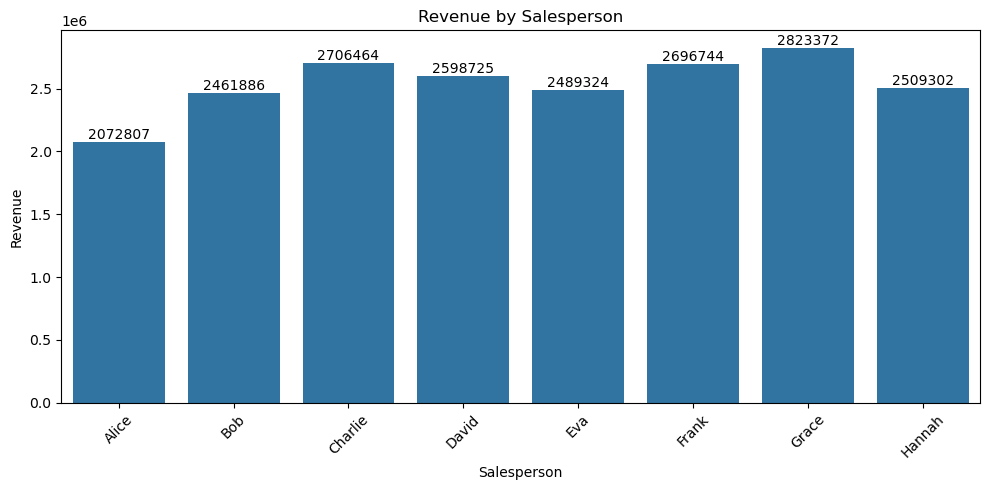

In [108]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: revenue by category
Intent detected: revenue_by_category
✅ Saved to voice_output2.csv (Power BI–safe schema)


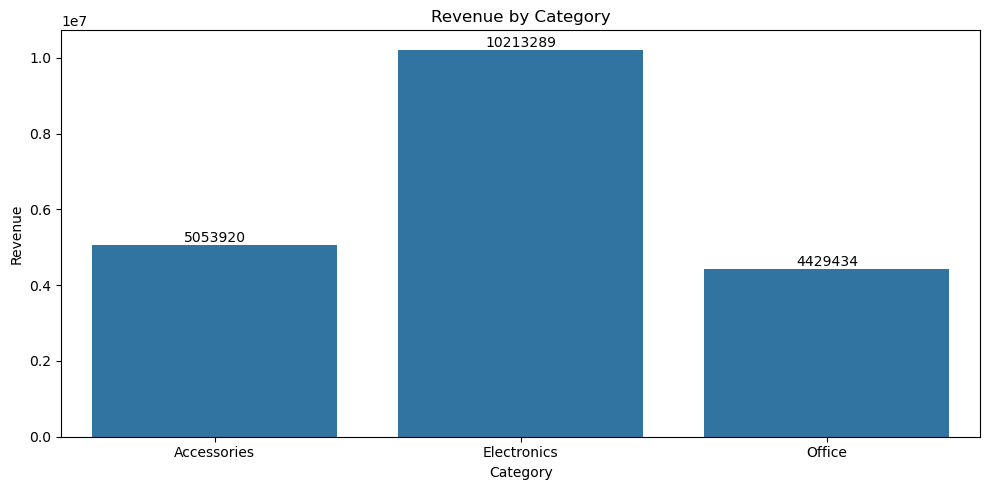

In [166]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: profit by region
Intent detected: profit_by_region
✅ Saved to voice_output2.csv (Power BI–safe schema)


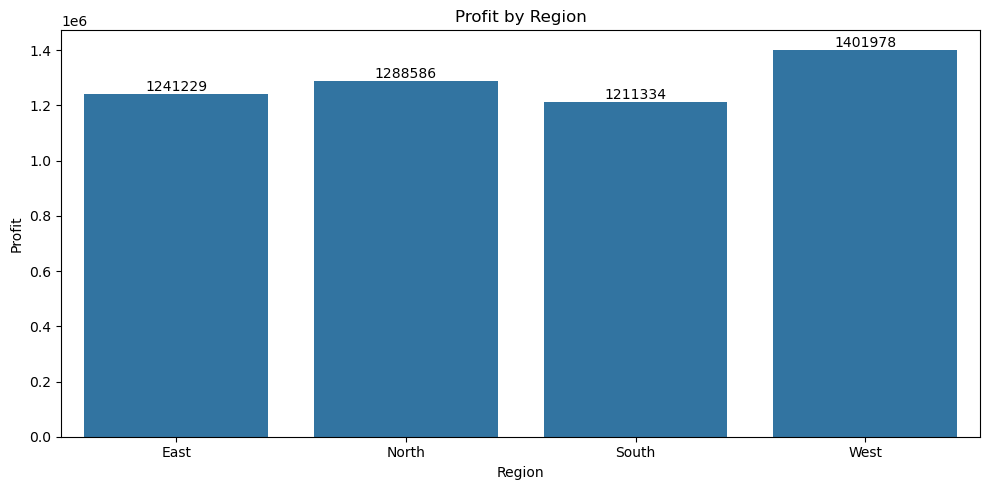

In [99]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: profit by product
Intent detected: profit_by_product
✅ Saved to voice_output2.csv (Power BI–safe schema)


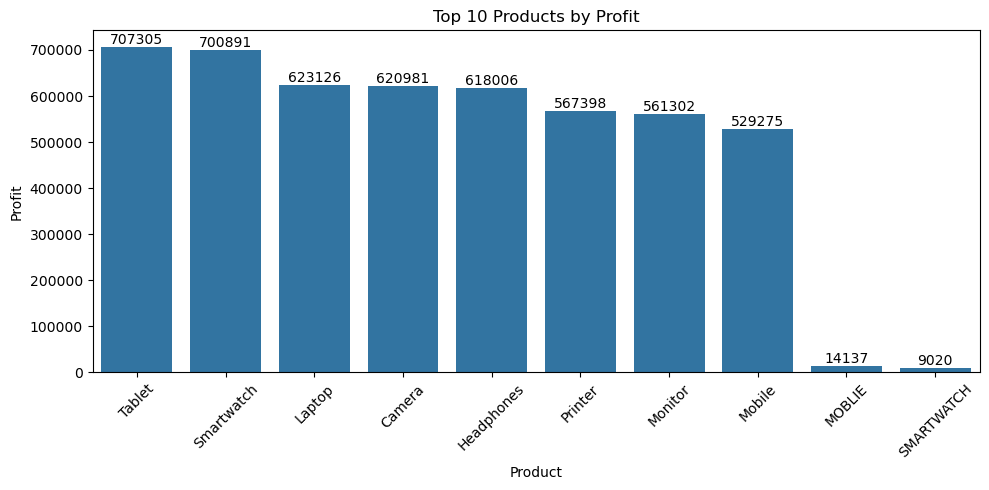

In [154]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: profit margin
Intent detected: profit_margin_analysis
✅ Saved to voice_output2.csv (Power BI–safe schema)


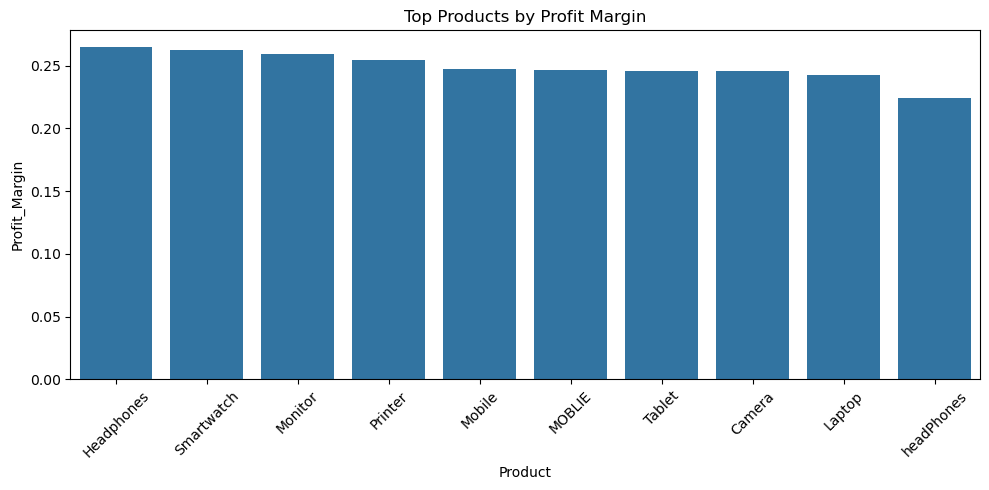

In [155]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: monthly revenue Trend
Intent detected: monthly_revenue_trend
✅ Saved to voice_output2.csv (Power BI–safe schema)


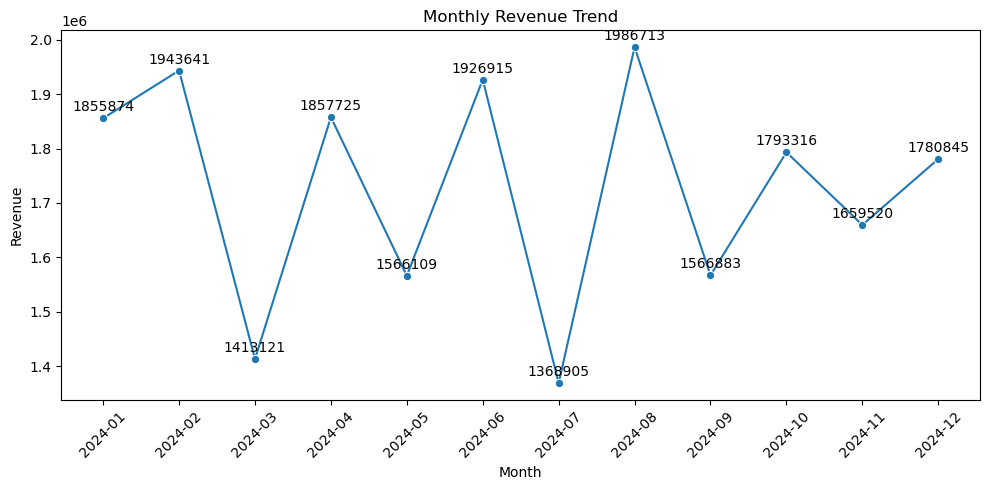

In [100]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: units sold
Intent detected: units_sold_analysis
✅ Saved to voice_output2.csv (Power BI–safe schema)


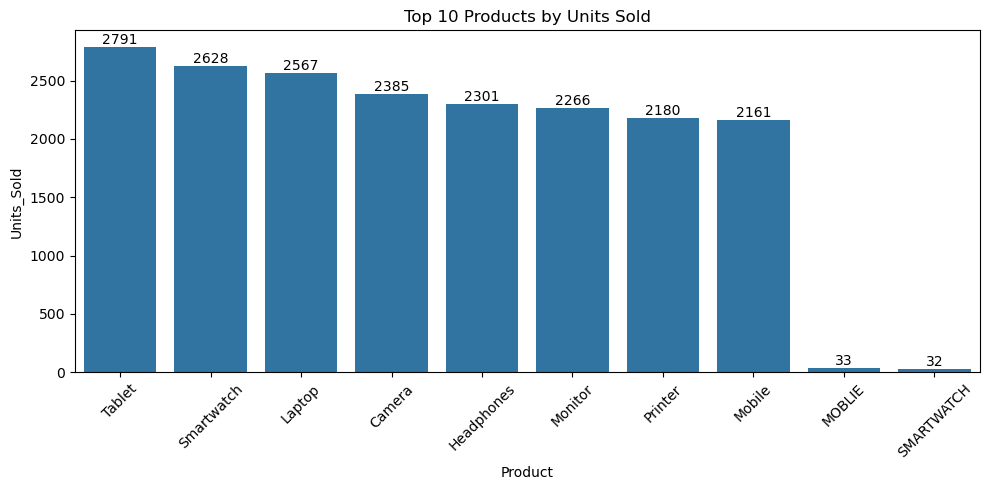

In [102]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: cost by category
Intent detected: cost_by_category
✅ Saved to voice_output2.csv (Power BI–safe schema)


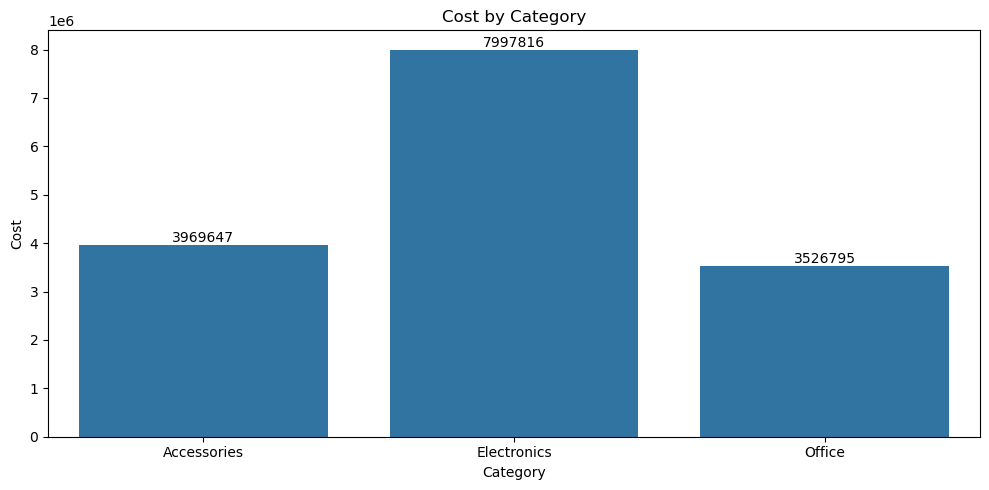

In [103]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

In [107]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

🎙 Speak your BI command...
✅ You said: year wise sales
Intent detected: yearly_revenue_trend
❌ Unknown intent


<Figure size 1000x500 with 0 Axes>

In [ ]:
def run_voice_bi():
    command = get_voice_command()
    intent = parse_command(command)
    if intent:
        print("Intent detected:", intent)
        analyze_and_plot(intent)
    else:
        print("Could not determine intent.")
run_voice_bi()

In [162]:
# Intent → keywords mapping (dataset-aware)
INTENT_KEYWORDS = {

    # 1️⃣ Sales / Revenue analysis
    "revenue_by_salesperson": [
        "sales by salesperson", "revenue by person", "employee sales",
        "salesperson performance", "who sold most", "Sales person"
    ],

    "revenue_by_region": [
        "sales by region", "regional sales", "revenue by region",
        "which region performs best", 
    ],

    "revenue_by_product": [
        "sales by product", "product performance", "top product",
        "which product sells most", "revenue by product"
    ],

    "revenue_by_category": [
        "category sales", "revenue by category",
        "category performance"
    ],

    # 2️⃣ Profit analysis
    "profit_by_region": [
        "profit by region", "regional profit", "most profitable region",
    ],

    "profit_by_product": [
        "profit by product", "most profitable product",
        "product profit"
    ],

    "profit_margin_analysis": [
        "profit margin", "margin analysis",
        "low margin products"
    ],

    # 3️⃣ Pricing & quantity
    "units_sold_analysis": [
        "units sold", "quantity sold",
        "items sold", "sales volume"
    ],

    "price_analysis": [
        "price", "unit price analysis",
        "pricing trend"
    ],

    # 4️⃣ Time-based analysis
    "monthly_revenue_trend": [
        "monthly sales", "monthly revenue",
        "sales trend", "month wise sales"
    ],

    "yearly_revenue_trend": [
        "yearly sales", "annual revenue",
        "year wise sales"
    ],

    # 5️⃣ Cost analysis
    "cost_by_category": [
        "cost by category", "category cost",
        "high cost products"
    ]
}